# 3-channel version of the DAGMNET model v1.3:

In [1]:
from DAGMNET_methods import *

Subject: 1 of 8


/faststorage/project/mri-infarct-segmentation/Anders/Figures_for_rapport/SegMethods/DAGMNET/DAGMNET_methods.py:306: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  labels = np.array(scipy.ndimage.label(binary, structure=structure))[0]


Dice for slice: 0.0


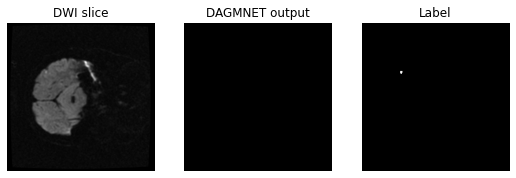

Dice for slice: 0


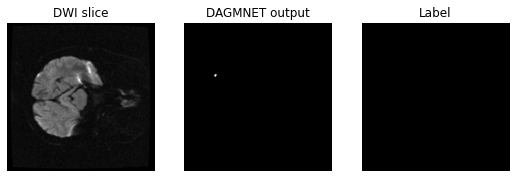

Dice for slice: 0


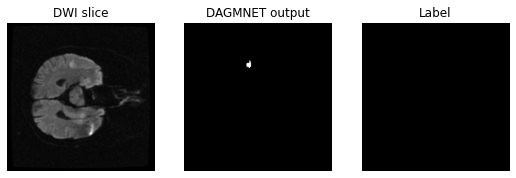

Dice for slice: 0.0


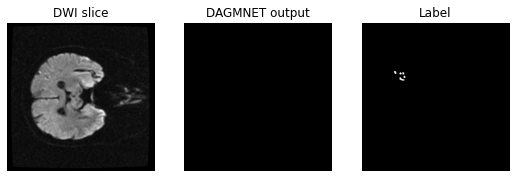

Dice for slice: 0.305


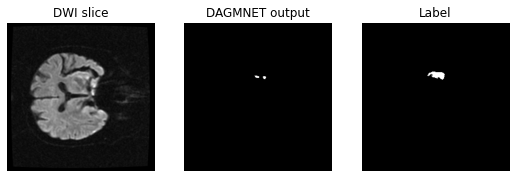

Dice for slice: 0.735


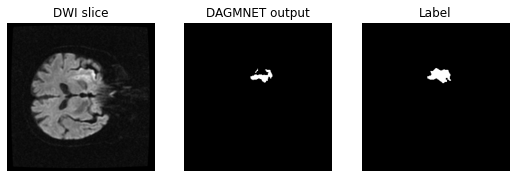

Dice for slice: 0.872


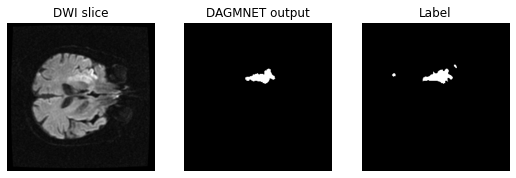

Dice for slice: 0.926


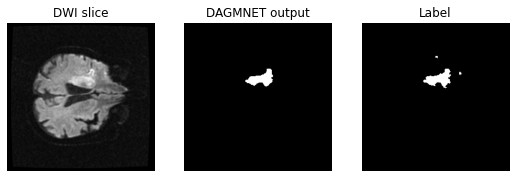

Dice for slice: 0.894


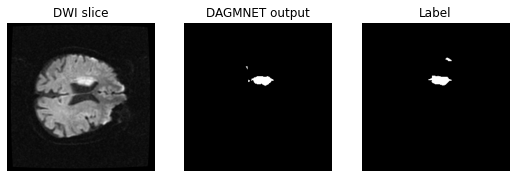

Dice for slice: 0.664


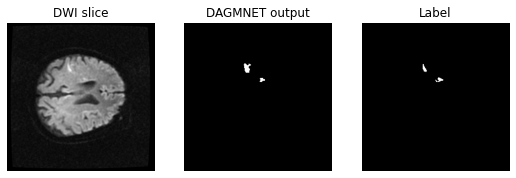

Dice for slice: 0.73


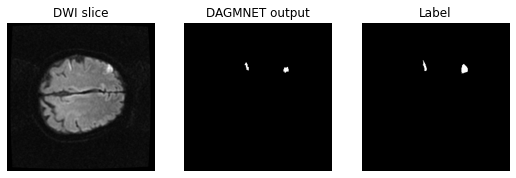

Dice for slice: 0.951


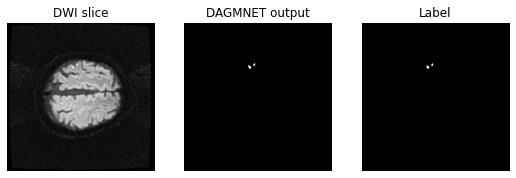

Mean slice dice for subject: 0.506
Volume dice for subject: 0.797
_____________________________
Subject: 2 of 8
Dice for slice: 0.777


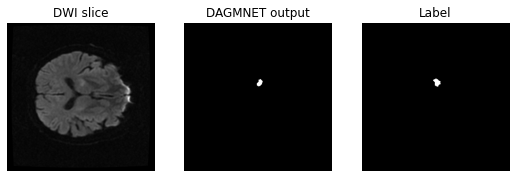

Mean slice dice for subject: 0.777
Volume dice for subject: 0.777
_____________________________
Subject: 3 of 8
Dice for slice: 0.84


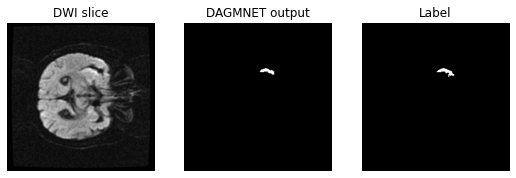

Dice for slice: 0.823


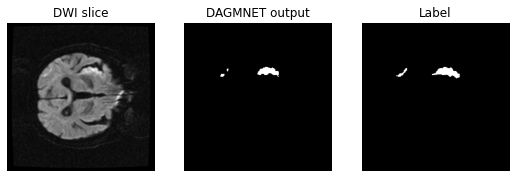

Dice for slice: 0.793


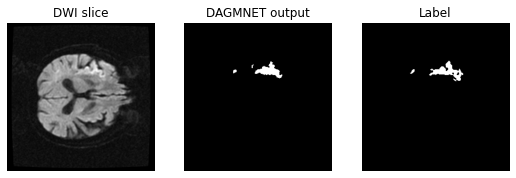

Dice for slice: 0.801


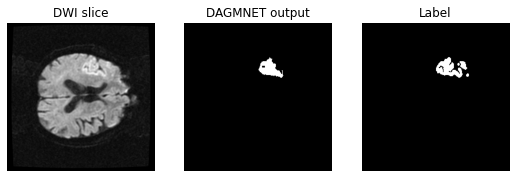

Dice for slice: 0.76


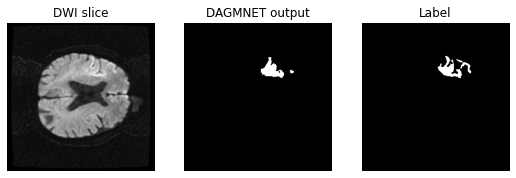

Dice for slice: 0.728


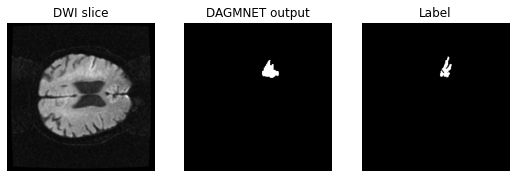

Dice for slice: 0.337


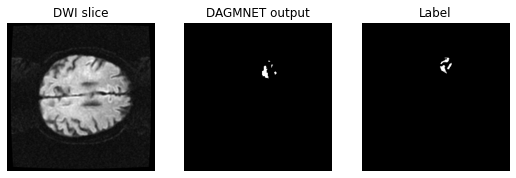

Dice for slice: 0.619


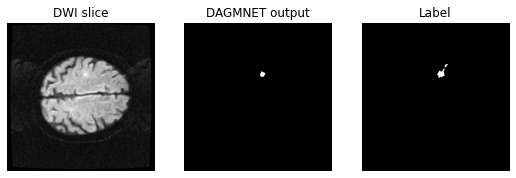

Dice for slice: 0.0


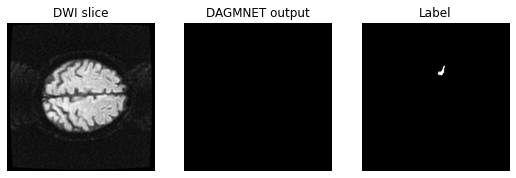

Dice for slice: 0.791


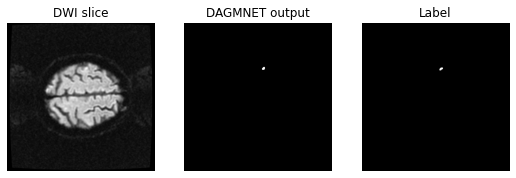

Dice for slice: 0


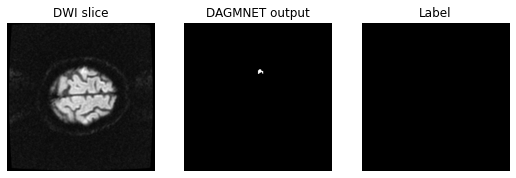

Mean slice dice for subject: 0.59
Volume dice for subject: 0.747
_____________________________
Subject: 4 of 8
Dice for slice: 0


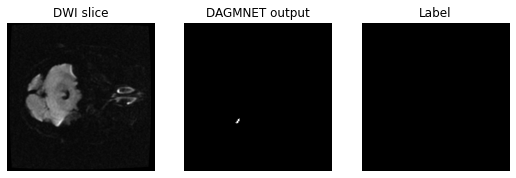

Dice for slice: 0.59


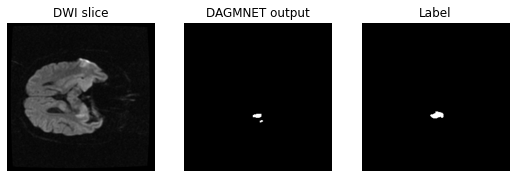

Dice for slice: 0.819


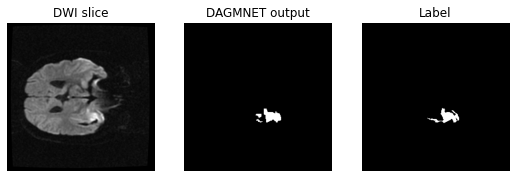

Dice for slice: 0.883


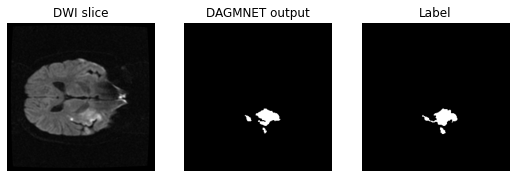

Dice for slice: 0.798


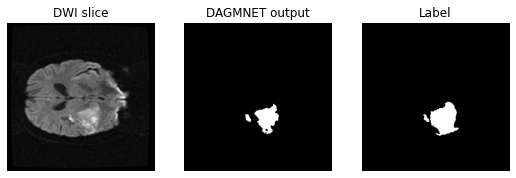

Dice for slice: 0.892


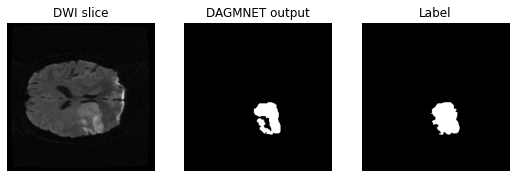

Dice for slice: 0.86


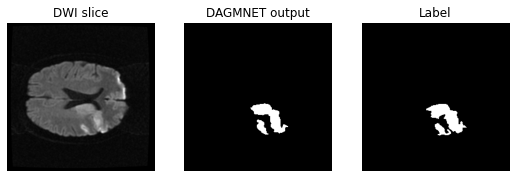

Dice for slice: 0.73


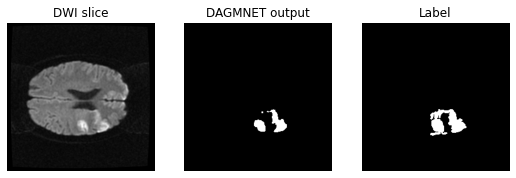

Dice for slice: 0.573


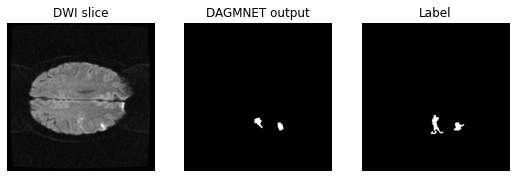

Dice for slice: 0.777


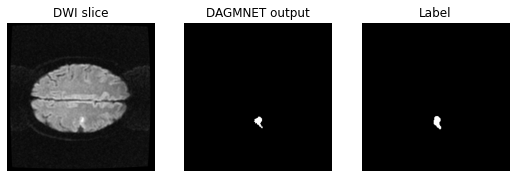

Dice for slice: 0.949


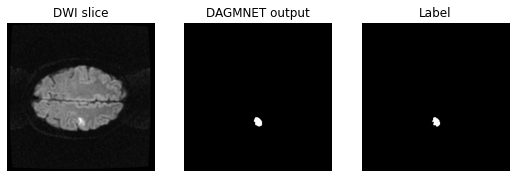

Dice for slice: 0


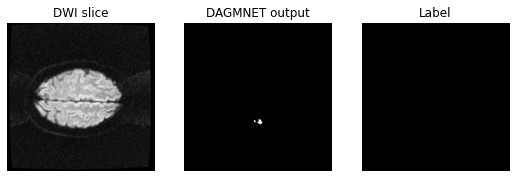

Dice for slice: 0


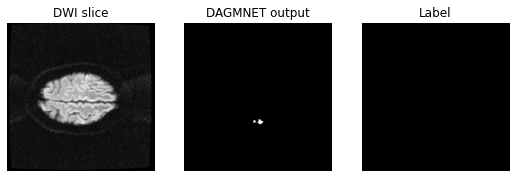

Dice for slice: 0


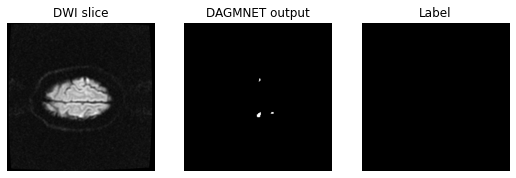

Mean slice dice for subject: 0.562
Volume dice for subject: 0.81
_____________________________
Subject: 5 of 8
Dice for slice: 0.827


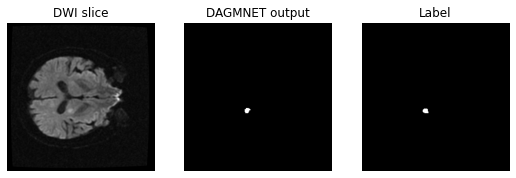

Dice for slice: 0.793


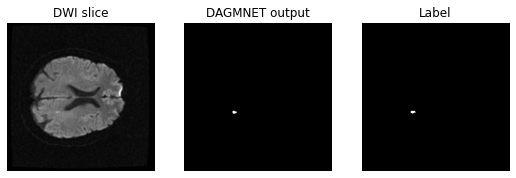

Dice for slice: 0.902


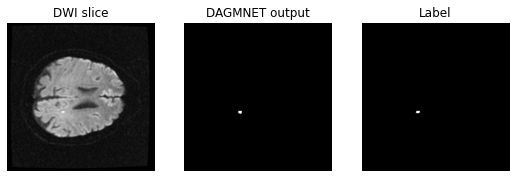

Dice for slice: 0.806


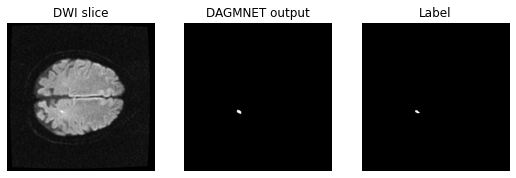

Mean slice dice for subject: 0.832
Volume dice for subject: 0.829
_____________________________
Subject: 6 of 8
Dice for slice: 0


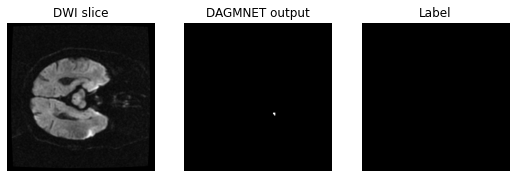

Dice for slice: 0.803


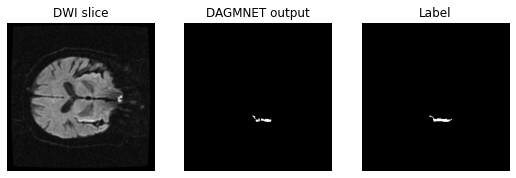

Dice for slice: 0.885


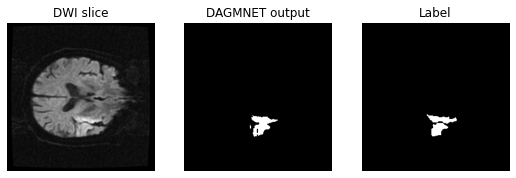

Dice for slice: 0.953


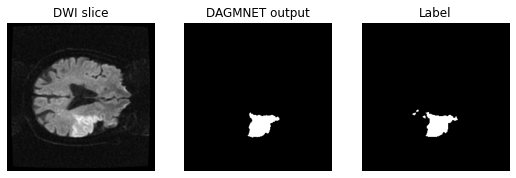

Dice for slice: 0.9


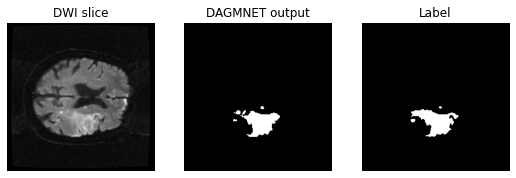

Dice for slice: 0.854


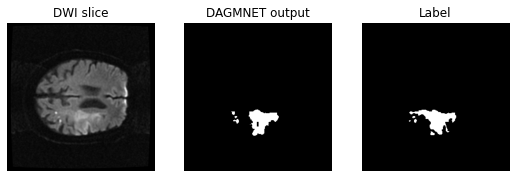

Dice for slice: 0.836


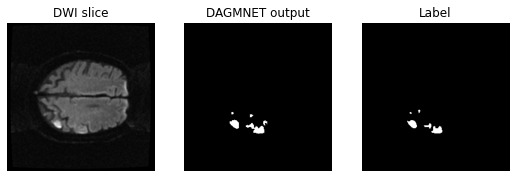

Dice for slice: 0.897


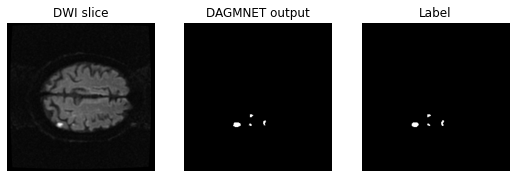

Dice for slice: 0


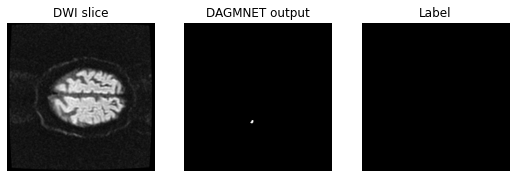

Mean slice dice for subject: 0.681
Volume dice for subject: 0.89
_____________________________
Subject: 7 of 8
Dice for slice: 0.839


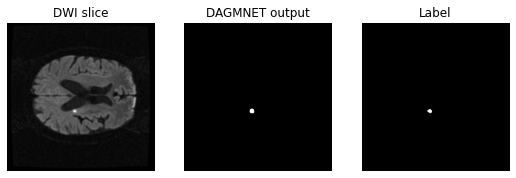

Dice for slice: 0.789


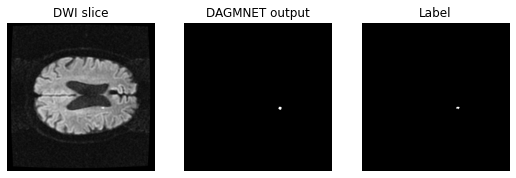

Dice for slice: 0.0


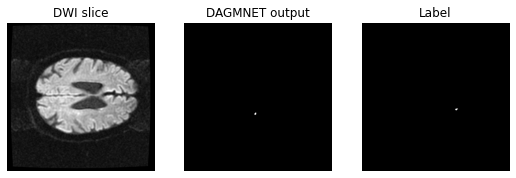

Dice for slice: 0.459


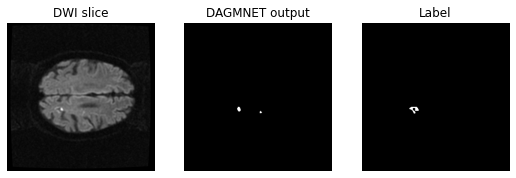

Dice for slice: 0.654


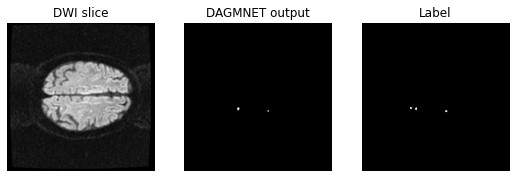

Dice for slice: 0.63


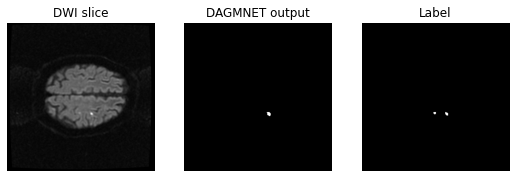

Dice for slice: 0


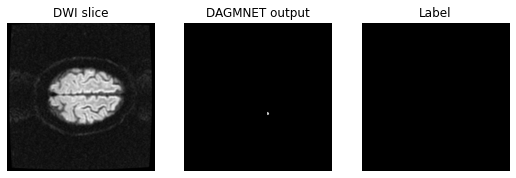

Dice for slice: 0


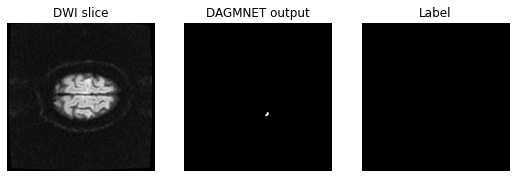

Mean slice dice for subject: 0.421
Volume dice for subject: 0.557
_____________________________
Subject: 8 of 8
Dice for slice: 0.393


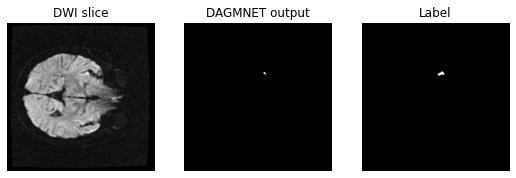

Dice for slice: 0.626


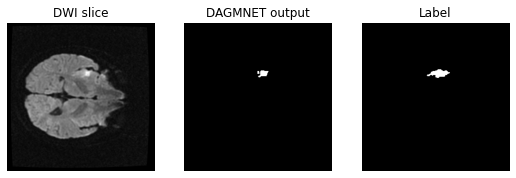

Dice for slice: 0.942


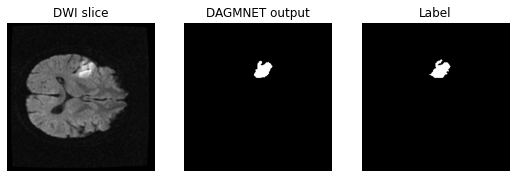

Dice for slice: 0.94


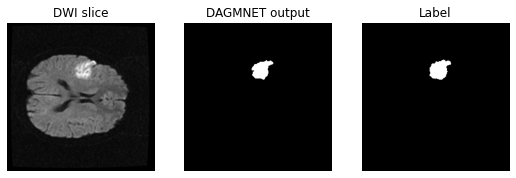

Dice for slice: 0.818


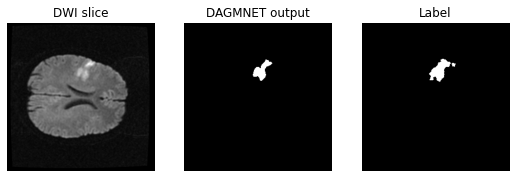

Dice for slice: 0.089


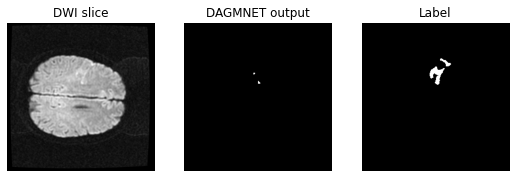

Dice for slice: 0.0


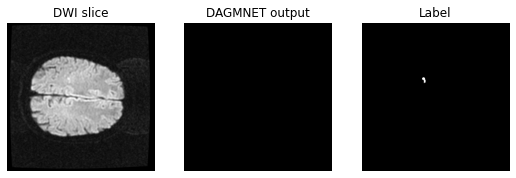

Dice for slice: 0.825


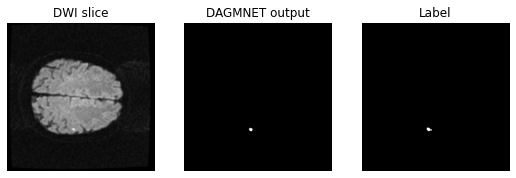

Dice for slice: 0.0


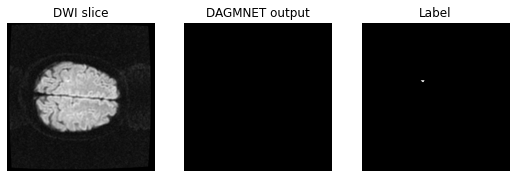

Dice for slice: 0


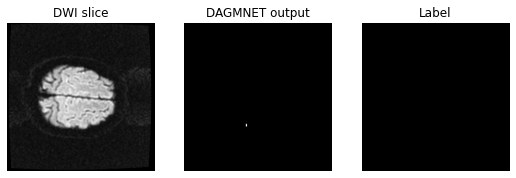

Dice for slice: 0.8


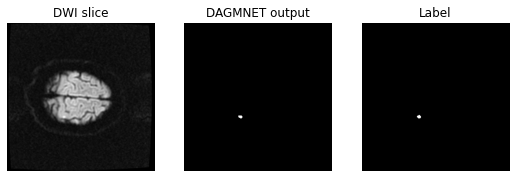

Mean slice dice for subject: 0.494
Volume dice for subject: 0.787
_____________________________
__________________________________________________________________
Mean slice dice for each subject: [0.5064498707138917, 0.7772020725388601, 0.5902204108591343, 0.5621558724529497, 0.8321458786664364, 0.6808421398781929, 0.42142822012958303, 0.49395156049787875]
Volume dice for each subject: [0.7973221757322175, 0.7772020725388601, 0.7466666666666667, 0.8104301263023107, 0.8289473684210527, 0.889943074003795, 0.5567928730512249, 0.7874422899353647]

Mean slice dice for all subjects: 0.6080495032171158
Mean volume dice for all subjects: 0.7743433308314366


In [3]:
#Run model on data:
dicescores = []
Avg_Dice_subjects = [] #Slice based
Dice_for_subjects = [] #Slice based
Dice_vol_subjects = [] #Volume based
for i in range(0, len(df_test)):
    print('Subject:',i+1, 'of', len(df_test))
    dice_score_vol = []

    # Load data
    DWI_path, ADC_path, b0_path, label_path = data[i]

    # Preprocess input:
    Dwi_ss_MNI_BSN_img, ADC_ss_MNI_BSN_img, Prob_IS, affine_map, mask_raw_img, mask_raw_MNI_img = preprocess_pipeline(ADC_path, DWI_path, b0_path, N_channel)

    # Get lesion prediction:
    stroke_pred_img = get_stroke_seg_MNI(Lesion_model, Dwi_ss_MNI_BSN_img, ADC_ss_MNI_BSN_img, Prob_IS, N_channel=N_channel)
    
    # Transform map lesion back to raw space
    model_segmentation = postprocess(stroke_pred_img, affine_map, mask_raw_img, mask_raw_MNI_img)

    #Dice for volume:
    Label_vol = nib.load(label_path).get_fdata()
    dice_vol = Find_DICE_vol(model_segmentation, Label_vol)
    Dice_vol_subjects.append(dice_vol)

    # Loop though each slice:
    DWI_vol = nib.load(DWI_path).get_fdata()
    for i in range (0, len(DWI_vol[0,0,:])):
        DWI_slice = DWI_vol[:,:,i]
        Label_slice = Label_vol[:,:,i]
        model_output = model_segmentation[:,:,i]

        if np.sum(Label_slice) > 1 or np.sum(model_output) > 1: # "Empty" slices are not included
            # Dice:
            dice_score_slice = Find_DICE_slice(model_output, Label_slice)
            dice_score_vol.append(dice_score_slice)
            print('Dice for slice:', round(dice_score_slice,3))

            # Plot:
            plotFunc(DWI_slice, model_output, Label_slice)
        
    Dice_for_subjects.append(dice_score_vol)
    Avg_Dice_subjects.append(mean(dice_score_vol))
    print('Mean slice dice for subject:', round(mean(dice_score_vol),3))
    print('Volume dice for subject:', round(dice_vol,3))
    print('__________________________________')
print('____________________________________________________________________')
print('Mean slice dice for each subject:', Avg_Dice_subjects)
print('Volume dice for each subject:', Dice_vol_subjects)
print('')
print('Mean slice dice for all subjects:', mean(Avg_Dice_subjects))
print('Mean volume dice for all subjects:', mean(Dice_vol_subjects))

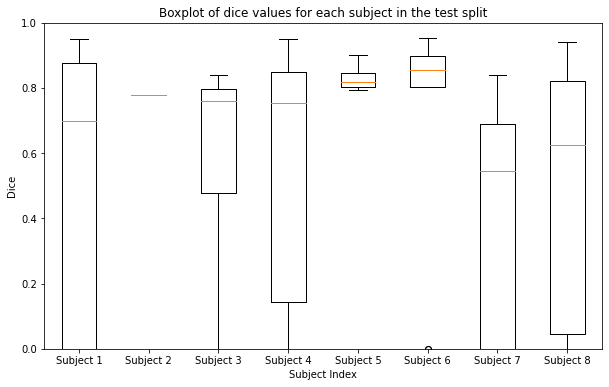

In [5]:
# Example data: a list of lists
data = Dice_for_subjects

# Create a figure and a set of subplots
plt.figure(figsize=(10, 6))

# Create the boxplot
plt.boxplot(data)

# Adding titles and labels
plt.title('Boxplot of dice values for each subject in the test split')
plt.xlabel('Subject Index')
plt.ylabel('Dice')

# Customize x-axis labels if needed
plt.xticks(range(1, len(data) + 1), ['Subject 1', 'Subject 2', 'Subject 3', 'Subject 4', 'Subject 5', 'Subject 6', 'Subject 7', 'Subject 8'])

# Set y-axis limits
plt.ylim(0, 1)

# Show the plot
plt.show()